# CAP - 351 - Neurocomputação - INPE
## Projeto 01 - Regressão
### Previsão de Emissões de CO2 in Ruanda

- Professor: Marcos Quiles
- Aluno: Rafael Caneiro de Oliveira
- Data: 2023-08-19


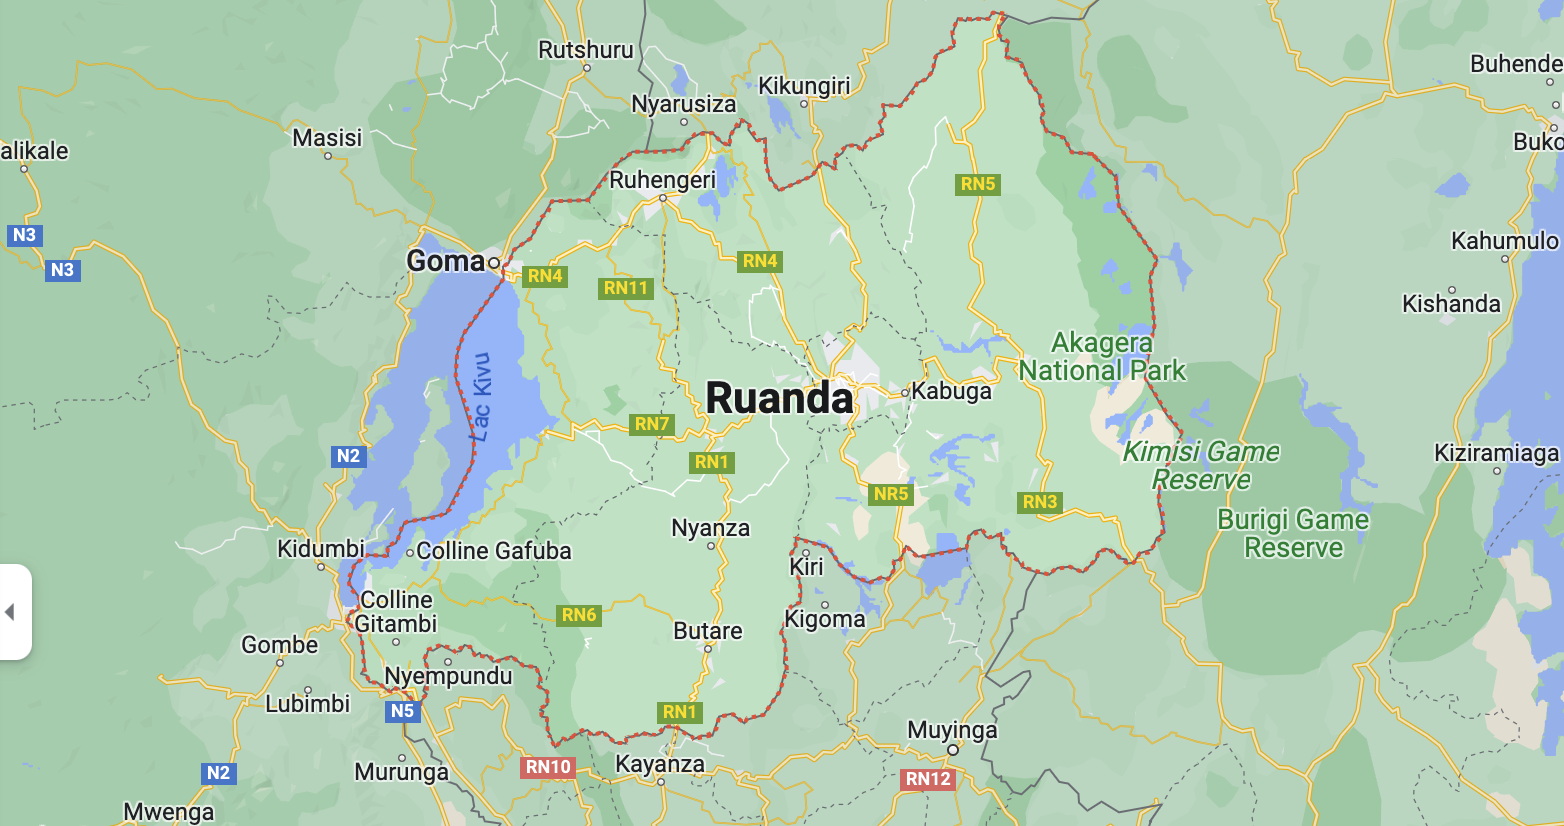

## Sobre o Conjunto de Dados

### Descrição

Esse conjunto de dados faz parte da Série Playground 2023 do Kaggle, com o objetivo de proporcionar à comunidade do Kaggle uma variedade de desafios leves que podem ser usados para aprender e aprimorar habilidades em diferentes aspectos da ciência de dados e aprendizado de máquina. Este episódio é semelhante ao Hackathon Kaggle/Zindi que foi realizado no workshop Kaggle@ICLR 2023: Soluções de ML na África, em Ruanda. Ele se baseia em uma parceria contínua entre Kaggle e Zindi para construir um impacto impulsionado pela comunidade em toda a África.

### Objetivo do Desafio

O objetivo deste desafio é criar modelos de aprendizado de máquina utilizando dados abertos de **emissões de CO2** provenientes das observações do satélite **Sentinel-5P** para prever futuras emissões de carbono.  

A habilidade de monitorar com precisão as emissões de carbono é um passo crítico na luta contra as mudanças climáticas. Medições precisas de carbono permitem que pesquisadores e governos compreendam as fontes e padrões de saída de massa de carbono.

Embora Europa e América do Norte tenham sistemas extensivos em operação para monitorar as emissões de carbono no solo, poucos estão disponíveis na África. Essas soluções podem ajudar a habilitar governos e outros atores a estimar os níveis de emissão de carbono em toda a África, mesmo em locais onde o monitoramento no solo não é possível.

### Detalhes do Conjunto de Dados

- **Localizações Únicas**: Aproximadamente 497 locais únicos foram selecionados em várias áreas de Ruanda, incluindo terras agrícolas, cidades e usinas de energia.
- **Divisão Temporal dos Dados**:
  - Dados de treinamento incluem os anos de 2019 a 2021.
  - A tarefa é prever os dados de emissões de CO2 para o ano de 2022 até novembro.  

- **Principais Características**:
  - Sete características principais foram extraídas semanalmente do Sentinel-5P, de janeiro de 2019 a novembro de 2022.
  - Cada característica (Dióxido de Enxofre, Monóxido de Carbono, etc.) contém subcaracterísticas, como `column_number_density`, que representa a densidade de coluna vertical ao nível do solo, calculada usando a técnica DOAS.
  


#### Links detalhados sobre cada característica estão disponíveis, incluindo como são medidas e as definições das variáveis.

- Sulphur Dioxide - [COPERNICUS/S5P/NRTI/L3_SO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_SO2?hl=en)
- Carbon Monoxide - [COPERNICUS/S5P/NRTI/L3_CO](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_CO?hl=en)
- Nitrogen Dioxide - [COPERNICUS/S5P/NRTI/L3_NO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_NO2?hl=en)
- Formaldehyde - [COPERNICUS/S5P/NRTI/L3_HCHO](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_HCHO?hl=en)
- UV Aerosol Index - [COPERNICUS/S5P/NRTI/L3_AER_AI](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_AER_AI?hl=en)
- Ozone - [COPERNICUS/S5P/NRTI/L3_O3](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_NRTI_L3_O3?hl=en)
- Cloud - [COPERNICUS/S5P/OFFL/L3_CLOUD](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CLOUD?hl=en)

.  
.  
.  
.  

Fonte: https://www.kaggle.com/competitions/playground-series-s3e20/overview

## Bibliotecas, Funções e Parâmetros

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import set_config
set_config(transform_output = "pandas")

SEED = 42

## First Look

In [38]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head(10)

(79023, 76)


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72

In [39]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID_LAT_LON_YEAR_WEEK,79023,79023,ID_-0.510_29.290_2019_00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,79023.0,NaN,NaN,NaN,-1.891072,0.694522,-3.299,-2.451,-1.882,-1.303,-0.51
longitude,79023.0,NaN,NaN,NaN,29.880155,0.810375,28.228,29.262,29.883,30.471,31.532
year,79023.0,NaN,NaN,NaN,2020.0,0.816502,2019.0,2019.0,2020.0,2021.0,2021.0
week_no,79023.0,NaN,NaN,NaN,26.0,15.297155,0.0,13.0,26.0,39.0,52.0
SulphurDioxide_SO2_column_number_density,64414.0,NaN,NaN,NaN,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191
SulphurDioxide_SO2_column_number_density_amf,64414.0,NaN,NaN,NaN,0.834848,0.185382,0.241822,0.705817,0.809118,0.942792,1.885239
SulphurDioxide_SO2_slant_column_number_density,64414.0,NaN,NaN,NaN,0.000035,0.000206,-0.000887,-0.000078,0.000019,0.000121,0.004236
SulphurDioxide_cloud_fraction,64414.0,NaN,NaN,NaN,0.158418,0.071364,0.0,0.110535,0.161855,0.211824,0.299998
SulphurDioxide_sensor_azimuth_angle,64414.0,NaN,NaN,NaN,-7.92587,64.263368,-179.537059,-56.782383,-12.441726,72.05999,122.0952


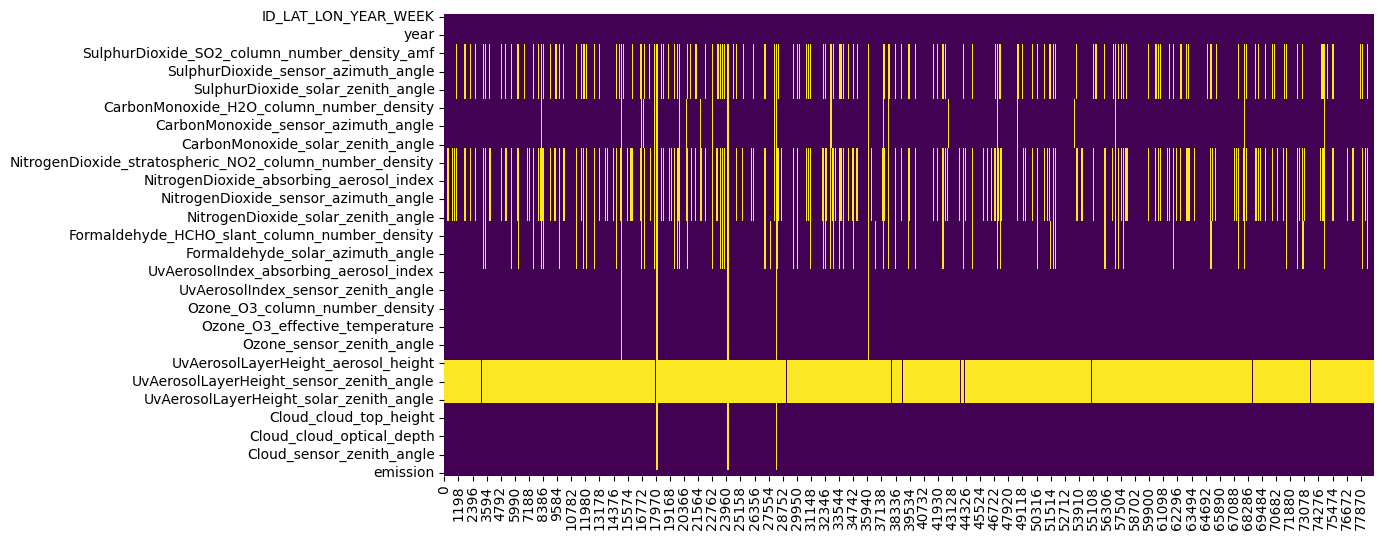

In [40]:
def plot_nulls(df):
    """
    Plots the null values in a DataFrame
    """
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull().T, cmap='viridis', cbar=False)
    plt.show()

plot_nulls(df)


In [41]:
df.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

## Seleção do Conjunto de Dados

Para facilitar a análise dos dados e desenvolvimento do modelo, vamos selecionar apenas os principais atributos em cada característica obtida do satélite Sentinel-5P


In [42]:
cols = df.columns
cols = [c for c in cols if 'solar' not in c]
cols = [c for c in cols if 'cloud' not in c]
cols = [c for c in cols if 'Cloud' not in c]
cols = [c for c in cols if 'slant' not in c]
cols = [c for c in cols if 'index' not in c]
cols = [c for c in cols if 'sensor' not in c]

cols

['ID_LAT_LON_YEAR_WEEK',
 'latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Ozone_O3_column_number_density',
 'Ozone_O3_column_number_density_amf',
 'Ozone_O3_effective_temperature',
 'UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'emission']

## EDA

In [43]:
# sns.pairplot(data=df[[c for c in cols if 'SulphurDioxide' in c]+['emission']])

In [44]:
# sns.pairplot(data=df[[c for c in cols if 'CarbonMonoxide' in c]+['emission']])

In [45]:
# sns.pairplot(data=df[[c for c in cols if 'NitrogenDioxide' in c]+['emission']])

In [46]:
# sns.pairplot(data=df[[c for c in cols if 'Formaldehyde' in c]+['emission']])

In [47]:
# sns.pairplot(data=df[[c for c in cols if 'Ozone' in c]+['emission']])

In [48]:
# sns.pairplot(data=df[[c for c in cols if 'UvAerosol' in c]+['emission']])

### Target - Emissions

<Axes: >

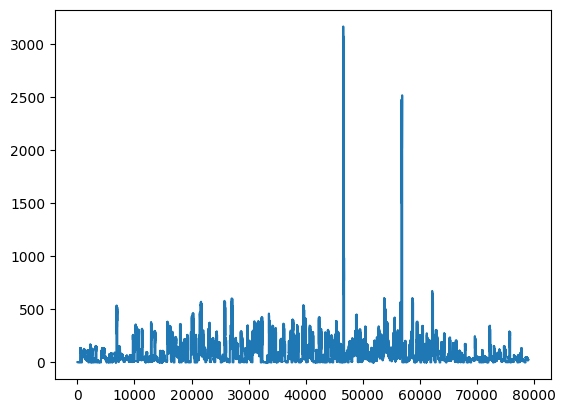

In [49]:
df.emission.plot()

<Axes: >

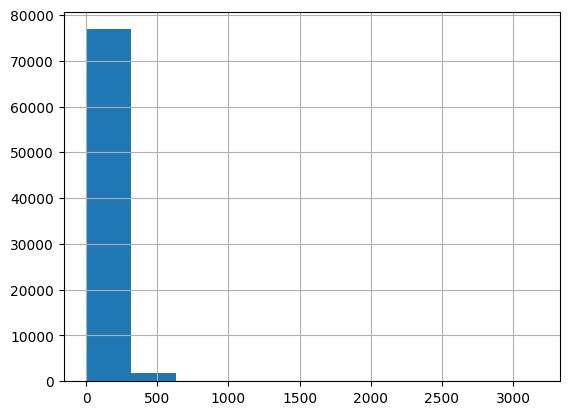

In [50]:
df.emission.hist()

In [51]:
df.emission.describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

<Axes: >

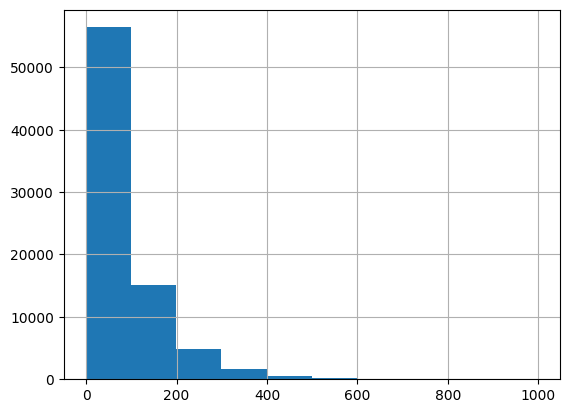

In [52]:
df[df.emission<1000].emission.hist()

<Axes: >

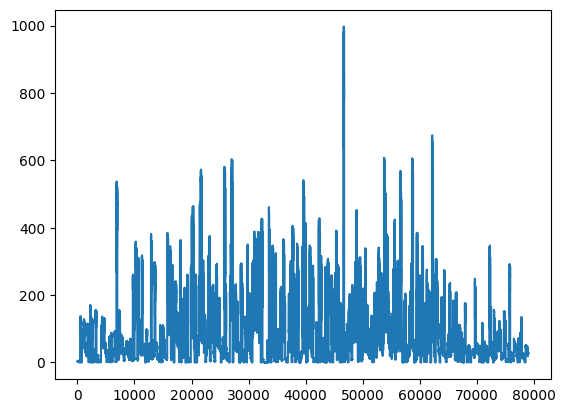

In [53]:
df[df.emission<1000].emission.plot()

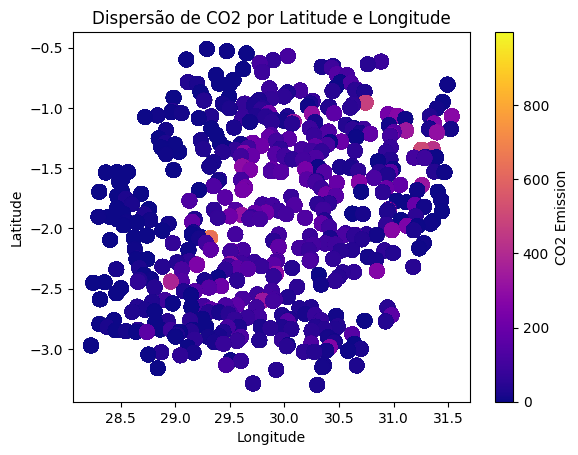

In [54]:
df2 = df[df.emission < 1000]
plt.scatter(df2['longitude'], df2['latitude'], c=df2['emission'], cmap='plasma', s=100)
plt.colorbar().set_label('CO2 Emission')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dispersão de CO2 por Latitude e Longitude')
plt.grid(False)
plt.show()

In [55]:
df['quarter'] = pd.cut(df.week_no, bins=4, labels=[1,2,3,4])
df['quarter'].value_counts()

quarter
1    20874
2    19383
3    19383
4    19383
Name: count, dtype: int64

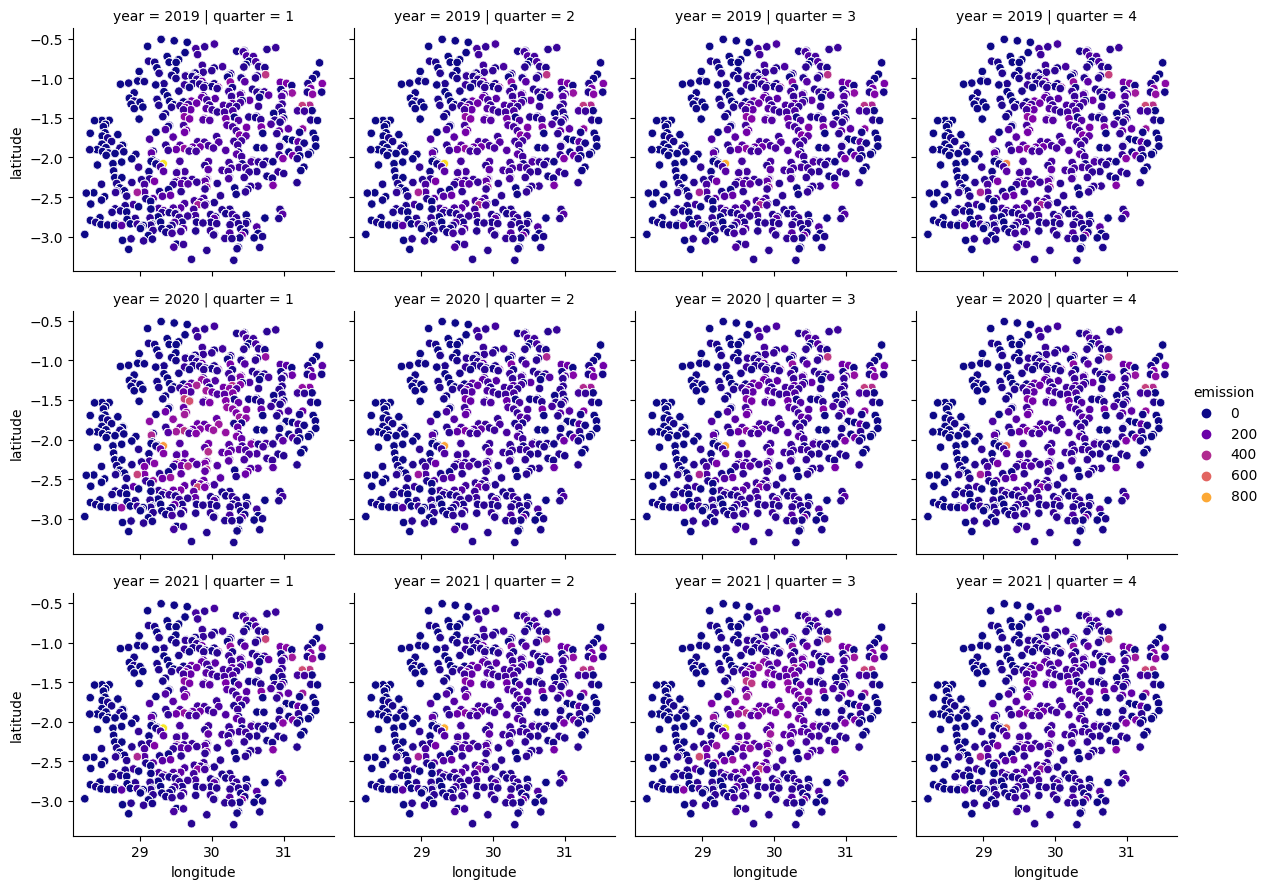

In [56]:
sns.relplot(data=df[df.emission<1000], x='longitude', y='latitude', kind='scatter', col='quarter', row='year', hue='emission', palette='plasma', height=3, aspect=1)

## Features
Vamos selectionar as veriáveis já analisadas durante o EDA e também a nova variável criada `quarter`.


In [57]:
features = [c for c in cols if c not in ['ID_LAT_LON_YEAR_WEEK', 'emission']] + ['quarter']
target = 'emission'

## Train / Test Split
Como o dataset possui uma componente temporal, ou seja, são observações registradas ao longo do tempo, a divisão entre treino, validação e teste deve respeitar essa condição. Caso contrário dados do futuro poderão ser vazados para o treinamento do modelo.

In [58]:

X_train, X_val, X_test = df[df.year == 2019][features], df[df.year == 2020][features], df[df.year == 2021][features]
y_train, y_val, y_test = df[df.year == 2019][target], df[df.year == 2020][target], df[df.year == 2021][target]
print(X_train.shape, X_val.shape, X_test.shape)

(26341, 22) (26341, 22) (26341, 22)


## Preprocessing
Vamos verificar se existem dados nulos em nossas variáveis selecionadas e ajustá-los atavés de uma imputação simples e também realizar normalização dos dados para utilização com a MLP.

In [59]:
X_train[features].isna().sum() / X_train.shape[0]

latitude                                                    0.000000
longitude                                                   0.000000
year                                                        0.000000
week_no                                                     0.000000
SulphurDioxide_SO2_column_number_density                    0.105349
SulphurDioxide_SO2_column_number_density_amf                0.105349
SulphurDioxide_SO2_column_number_density_15km               0.105349
CarbonMonoxide_CO_column_number_density                     0.024069
CarbonMonoxide_H2O_column_number_density                    0.024069
NitrogenDioxide_NO2_column_number_density                   0.242360
NitrogenDioxide_tropospheric_NO2_column_number_density      0.242360
NitrogenDioxide_stratospheric_NO2_column_number_density     0.242360
NitrogenDioxide_tropopause_pressure                         0.242360
Formaldehyde_tropospheric_HCHO_column_number_density        0.066702
Formaldehyde_tropospheric_HCHO_col

As variáveis do grupo `UvAerosol` apresentam um percentual de nulos muito alto e portanto serão eliminadas do conjunto de variáveis de entrada do modelo. As demais variáveis serão imputadas pela média.

In [60]:
features = [c for c in features if 'UvAerosol' not in c]
features

['latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Ozone_O3_column_number_density',
 'Ozone_O3_column_number_density_amf',
 'Ozone_O3_effective_temperature',
 'quarter']

In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train[features])
X_val = imputer.transform(X_val[features])
X_test = imputer.transform(X_test[features])


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [63]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,26341.0,0.504814,0.249025,0.0,0.304052,0.508067,0.715669,1.0
longitude,26341.0,0.500047,0.245274,0.0,0.312954,0.500908,0.678874,1.0
year,26341.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
week_no,26341.0,0.500000,0.294180,0.0,0.250000,0.500000,0.750000,1.0
SulphurDioxide_SO2_column_number_density,26341.0,0.196578,0.044905,0.0,0.175114,0.193607,0.212466,1.0
SulphurDioxide_SO2_column_number_density_amf,26341.0,0.324130,0.112858,0.0,0.251094,0.311038,0.383835,1.0
SulphurDioxide_SO2_column_number_density_15km,26341.0,0.246503,0.043299,0.0,0.225003,0.243809,0.262931,1.0
CarbonMonoxide_CO_column_number_density,26341.0,0.328475,0.127531,0.0,0.239327,0.311475,0.389332,1.0
CarbonMonoxide_H2O_column_number_density,26341.0,0.183091,0.073448,0.0,0.135911,0.174123,0.217563,1.0
NitrogenDioxide_NO2_column_number_density,26341.0,0.203592,0.033726,0.0,0.188401,0.201960,0.216079,1.0


## Baseline Model
Como referência para nosso modelo MLP vamos utilizar um modelo de ML bem robusto e que normalmente apresenta um bom resultado sem necessidade de muitos ajustes dos hiperâmetros.

In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=SEED, n_jobs=-1)
model.fit(X_train[features], y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [65]:
from sklearn.metrics import mean_squared_error
print(f'Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.4f}')
print(f'Val RMSE: {mean_squared_error(y_val, model.predict(X_val), squared=False):.4f}')

Train RMSE: 8.7599
Val RMSE: 36.2473


## MLP - V1

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError

num_input_features = 19  

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_input_features))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 64)                1280      
                                                                 
 dense_67 (Dense)            (None, 128)               8320      
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)
print(f'Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.4f}')
print(f'Val RMSE: {mean_squared_error(y_val, model.predict(X_val), squared=False):.4f}')

Epoch 1/50


824/824 [==============================] - 2s 2ms/step - loss: 22420.5898 - root_mean_squared_error: 149.7351 - val_loss: 18847.3223 - val_root_mean_squared_error: 137.2856
Epoch 2/50
824/824 [==============================] - 1s 2ms/step - loss: 21845.9590 - root_mean_squared_error: 147.8038 - val_loss: 18845.9199 - val_root_mean_squared_error: 137.2804
Epoch 3/50
824/824 [==============================] - 1s 2ms/step - loss: 21259.5703 - root_mean_squared_error: 145.8066 - val_loss: 18318.1992 - val_root_mean_squared_error: 135.3447
Epoch 4/50
824/824 [==============================] - 1s 2ms/step - loss: 20323.0273 - root_mean_squared_error: 142.5589 - val_loss: 18707.8125 - val_root_mean_squared_error: 136.7765
Epoch 5/50
824/824 [==============================] - 1s 2ms/step - loss: 19701.3828 - root_mean_squared_error: 140.3616 - val_loss: 20878.0410 - val_root_mean_squared_error: 144.4924
Epoch 6/50
824/824 [==============================] - 1s 2ms/step - loss: 19329.0469 - root

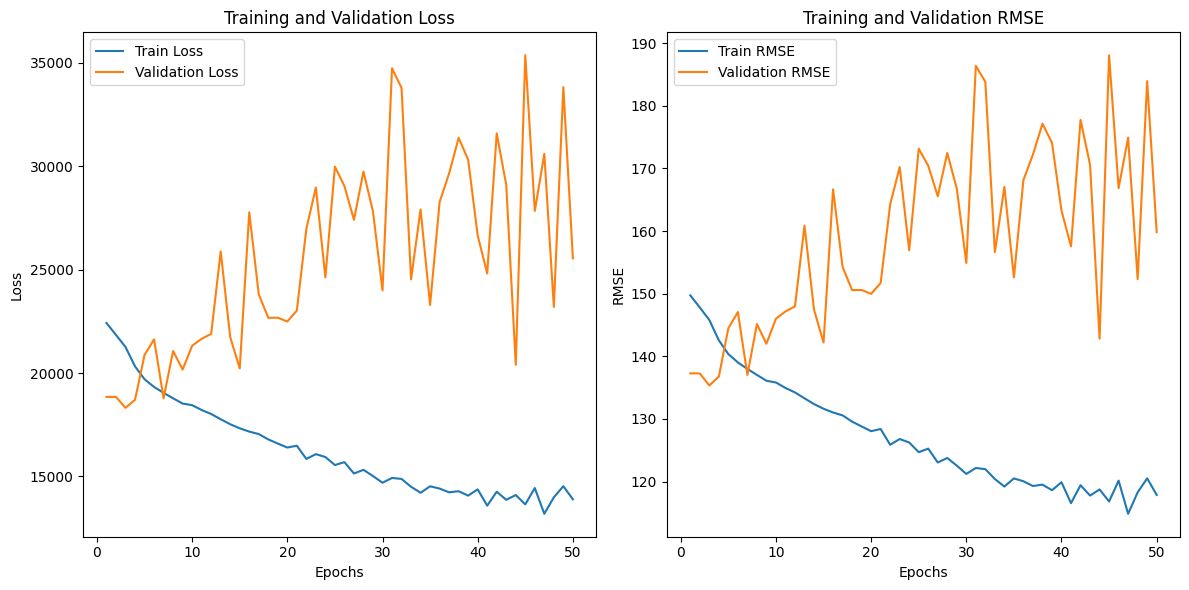

In [88]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_rmse, label='Train RMSE')
plt.plot(epochs, val_rmse, label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


Com base nessas curvas de aprendizado podemos tirar algumas conclusões iniciais:

**Overfitting**: O desempenho do modelo na validação (RMSE de validação) é consistentemente pior do que no treinamento (RMSE de treinamento). Isso indica que o modelo está sofrendo de overfitting, ou seja, está se ajustando excessivamente aos dados de treinamento e não está generalizando bem para dados não vistos. Isso levanta a necessidade de adicionar regularização ao modelo, o que é abordado pelo uso de camadas de dropout.

**Variação na Validação**: A variação na métrica de RMSE de validação entre as épocas é notável. Isso sugere instabilidade na performance do modelo durante o treinamento. Uma possível explicação é que a taxa de aprendizado do otimizador pode estar desequilibrada. A redução da taxa de aprendizado e a aplicação de Parada Antecipada podem ajudar a estabilizar o treinamento e melhorar a generalização.

**Taxa de Aprendizado**: Pode haver dificuldades de convergência do modelo devido à taxa de aprendizado inicialmente alta. Reduzir a taxa de aprendizado pode ajudar a obter uma convergência mais suave e melhorar o desempenho geral.

**Parada Antecipada**: A implementação da Parada Antecipada é recomendada devido à flutuação na métrica de RMSE de validação. O modelo parece ter atingido seu ponto ótimo após um certo número de épocas e, a partir de então, não melhora significativamente. A Parada Antecipada pode impedir que o modelo continue treinando e potencialmente overfitting após esse ponto.  

Assim, vamos ajustar o modelo em etapas para avaliar o resultado de cada medida implementada.



## MLP - v2 - Overfitting
Apesar do modelo ter sinais de overfiting ainda não foi possível observar um resultado melhor que o modelo Baseline para o dataset de treino. Desta forma, vamos primeiramente tentar "garantir" que temos um modelo que consegue inicialmente aprender os detalhes dos conjunto de treinamento e depois então passaremos para a etapa de regulação, buscando a generalização.

In [104]:
num_input_features = 19  

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=num_input_features))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  

optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 128)               2560      
                                                                 
 dense_99 (Dense)            (None, 256)               33024     
                                                                 
 dense_100 (Dense)           (None, 512)               131584    
                                                                 
 dense_101 (Dense)           (None, 64)                32832     
                                                                 
 dense_102 (Dense)           (None, 1)                 65        
                                                                 
Total params: 200,065
Trainable params: 200,065
Non-trainable params: 0
_________________________________________________________________


In [105]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)
print(f'Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.4f}')
print(f'Val RMSE: {mean_squared_error(y_val, model.predict(X_val), squared=False):.4f}')

Epoch 1/50


824/824 [==============================] - 3s 3ms/step - loss: 29770.5762 - root_mean_squared_error: 172.5415 - val_loss: 24511.5098 - val_root_mean_squared_error: 156.5615
Epoch 2/50
824/824 [==============================] - 3s 3ms/step - loss: 29729.6113 - root_mean_squared_error: 172.4228 - val_loss: 24471.2617 - val_root_mean_squared_error: 156.4329
Epoch 3/50
824/824 [==============================] - 2s 3ms/step - loss: 29684.7910 - root_mean_squared_error: 172.2928 - val_loss: 24423.4902 - val_root_mean_squared_error: 156.2802
Epoch 4/50
824/824 [==============================] - 2s 3ms/step - loss: 29630.2402 - root_mean_squared_error: 172.1344 - val_loss: 24364.5918 - val_root_mean_squared_error: 156.0916
Epoch 5/50
824/824 [==============================] - 2s 3ms/step - loss: 29561.8574 - root_mean_squared_error: 171.9356 - val_loss: 24291.3906 - val_root_mean_squared_error: 155.8569
Epoch 6/50
824/824 [==============================] - 2s 3ms/step - loss: 29476.4785 - root

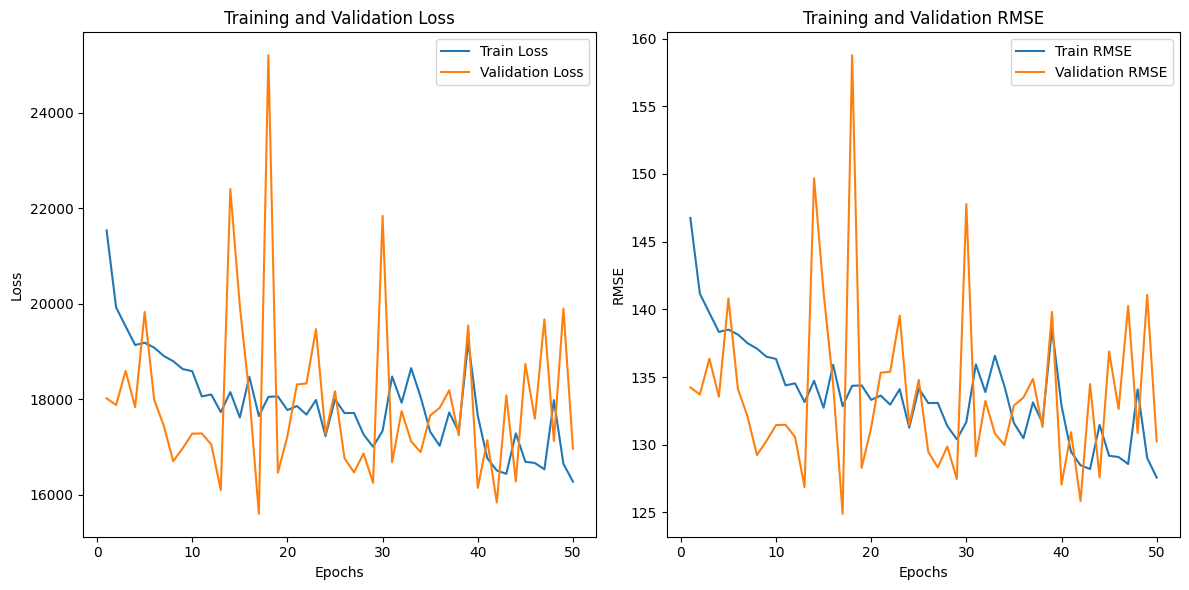

In [100]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_rmse, label='Train RMSE')
plt.plot(epochs, val_rmse, label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


## MLP - v3 - Regularização
Para aplicar regularização, vamos incluir camadas de Dropout, que "inativa" o peso de uma determidada fração de neurônios de forma aleatória.

In [69]:
num_input_features = 19  

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_input_features))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32) #, callbacks=[early_stopping])

Epoch 1/50
824/824 [==============================] - 2s 2ms/step - loss: 22569.1172 - root_mean_squared_error: 150.2302 - val_loss: 18621.2832 - val_root_mean_squared_error: 136.4598
Epoch 2/50
824/824 [==============================] - 2s 2ms/step - loss: 21862.5703 - root_mean_squared_error: 147.8600 - val_loss: 18519.6016 - val_root_mean_squared_error: 136.0867
Epoch 3/50
824/824 [==============================] - 1s 2ms/step - loss: 21332.2754 - root_mean_squared_error: 146.0557 - val_loss: 18500.4375 - val_root_mean_squared_error: 136.0163
Epoch 4/50
824/824 [==============================] - 1s 2ms/step - loss: 20669.8965 - root_mean_squared_error: 143.7703 - val_loss: 18797.6191 - val_root_mean_squared_error: 137.1044
Epoch 5/50
824/824 [==============================] - 1s 2ms/step - loss: 20347.6738 - root_mean_squared_error: 142.6453 - val_loss: 19091.2910 - val_root_mean_squared_error: 138.1712
Epoch 6/50
824/824 [==============================] - 1s 2ms/step - loss: 20157.

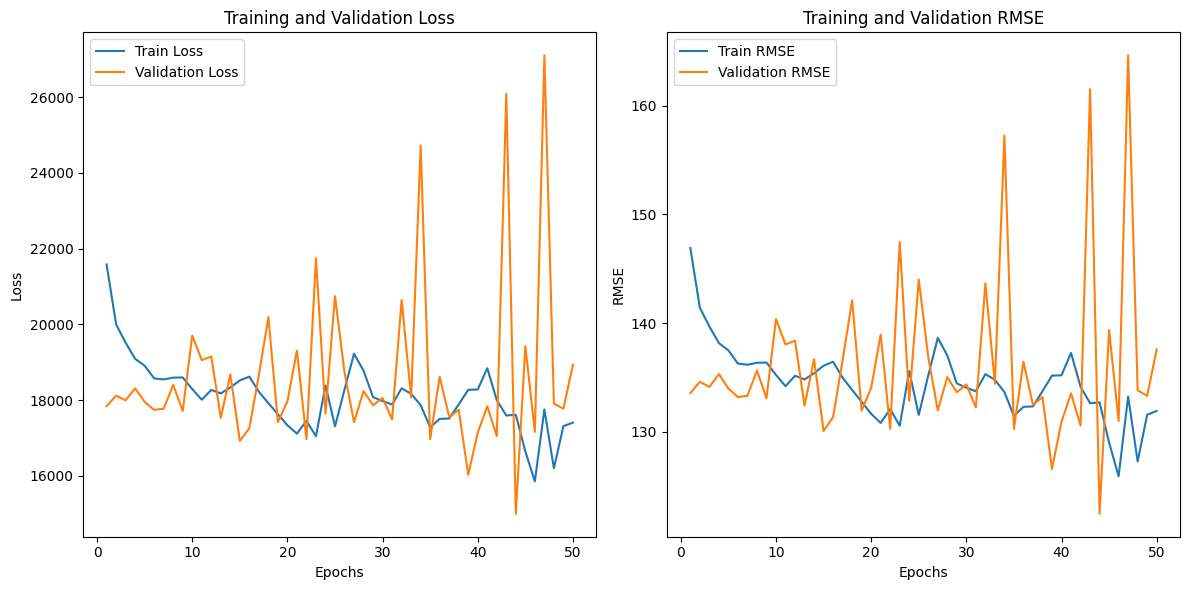

In [73]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_rmse, label='Train RMSE')
plt.plot(epochs, val_rmse, label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()
